In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("project_1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        27374 non-null  object 
 1   TREFMXAV_U  27374 non-null  float64
 2   FLNS        27374 non-null  float64
 3   FSNS        27374 non-null  float64
 4   PRECT       27374 non-null  float64
 5   PRSN        27374 non-null  float64
 6   QBOT        27374 non-null  float64
 7   TREFHT      27374 non-null  float64
 8   UBOT        27374 non-null  float64
 9   VBOT        27374 non-null  float64
 10  lat         27374 non-null  float64
 11  lon         27374 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.5+ MB


In [4]:
df.describe()

TREFMXAV_U          FLNS          FSNS         PRECT          PRSN  \
count  27374.000000  27374.000000  27374.000000  2.737400e+04  2.737400e+04   
mean     288.836179     42.995679     97.026261  3.379697e-08  3.049825e-10   
std        5.246468     21.451927     75.062880  4.986518e-08  4.706017e-09   
min      274.153200      0.611385      2.819259 -4.671764e-28 -6.256338e-21   
25%      284.719465     26.157544     31.037187  2.131118e-09  0.000000e+00   
50%      288.299895     40.777005     78.443183  1.311730e-08  1.206375e-21   
75%      292.869525     57.113572    149.332133  4.637272e-08  2.348279e-16   
max      311.257260    111.851400    310.191700  7.752961e-07  2.332090e-07   

               QBOT        TREFHT          UBOT          VBOT           lat  \
count  27374.000000  27374.000000  27374.000000  27374.000000  2.737400e+04   
mean       0.006523    284.876413      1.176320      1.503084  5.324608e+01   
std        0.002126      4.992277      3.066843      2.940138  1.659148e-11   
min        0.001855    268.938400     -9.739025     -8.991429  5.324607e+01   
25%        0.004860    280.987885     -1.085982     -0.766405  5.324607e+01   
50%        0.006211    284.537575      1.488009      1.593354  5.324607e+01   
75%        0.007947    288.900110      3.390555      3.634500  5.324607e+01   
max        0.015222    303.117980     10.234506     11.178102  5.324607e+01   

           lon  
count  27374.0  
mean     357.5  
std        0.0  
min      357.5  
25%      357.5  
50%      357.5  
75%      357.5  
max      357.5

In [5]:
df.head()

time  TREFMXAV_U       FLNS       FSNS         PRECT  \
0  2006-01-02 00:00:00   282.77585  41.925180  25.926952  4.663135e-09   
1  2006-01-03 00:00:00   284.47113   8.905806  10.946910  8.046593e-08   
2  2006-01-04 00:00:00   284.28796  16.511415   6.405902  2.910936e-09   
3  2006-01-05 00:00:00   282.12110  29.948362   9.315041  7.432505e-11   
4  2006-01-06 00:00:00   280.89090  19.064156   7.941241  6.894238e-12   

           PRSN      QBOT     TREFHT      UBOT      VBOT        lat    lon  
0  4.781004e-17  0.004769  279.14288  3.878579  1.394184  53.246075  357.5  
1  1.295726e-16  0.006271  281.14865  1.788157  3.821703  53.246075  357.5  
2  4.094447e-16  0.005782  281.22380  0.804845 -2.299140  53.246075  357.5  
3  0.000000e+00  0.004277  278.39767 -1.100267 -1.258029  53.246075  357.5  
4  0.000000e+00  0.003990  278.06378 -0.706321 -0.938421  53.246075  357.5

In [6]:
df['time'] = pd.to_datetime(df['time'])
df['time'].max()

Timestamp('2080-12-31 00:00:00')

In [7]:
checklat = df[df['lat'] != 53.246075]
checklat

Empty DataFrame
Columns: [time, TREFMXAV_U, FLNS, FSNS, PRECT, PRSN, QBOT, TREFHT, UBOT, VBOT, lat, lon]
Index: []

In [8]:
"""
date at lat 53.246075 lon 357.5 from 2006-01-02 to 2080-12-31
total 27374 days
TREFMXAV_U: Urban daily maximum of average 2-m temperature; 
FLNS: Net longwave flux at surface  地表下行长波辐射通量;
FSNS: Net solar flux at surface 地表近太阳辐射通量；
PRECT：Total (convective and large-scale) precipitation rate (liq + ice) 总降水量；
PRSN：Solid precipitation？固态降水？
QBOT：Lowest model level water vapor mixing ratio 最低模型层的水汽混合比；
TREFHT：Reference height temperature 地表以上2米处的气温；
UBOT：Lowest model level zonal wind 最低模型层的东西向风；
VBOT：Lowest model level meridional wind 最低模型层的南北向风
"""

'\ndate at lat 53.246075 lon 357.5 from 2006-01-02 to 2080-12-31\ntotal 27374 days\nTREFMXAV_U: Urban daily maximum of average 2-m temperature; \nFLNS: Net longwave flux at surface  地表下行长波辐射通量;\nFSNS: Net solar flux at surface 地表近太阳辐射通量；\nPRECT：Total (convective and large-scale) precipitation rate (liq + ice) 总降水量；\nPRSN：Solid precipitation？固态降水？\nQBOT：Lowest model level water vapor mixing ratio 最低模型层的水汽混合比；\nTREFHT：Reference height temperature 地表以上2米处的气温；\nUBOT：Lowest model level zonal wind 最低模型层的东西向风；\nVBOT：Lowest model level meridional wind 最低模型层的南北向风\n'

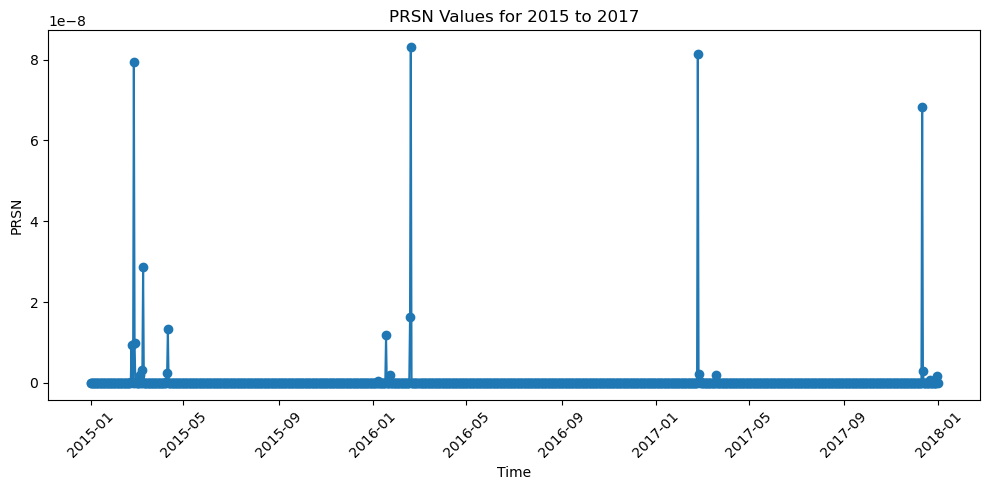

In [9]:
#choose three years to check PRSN
df['time'] = pd.to_datetime(df['time'])
selected_range = df[(df['time'].dt.year>=2015) & (df['time'].dt.year<=2017)]
selected_range.set_index('time', inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(selected_range['PRSN'], marker='o')
plt.title('PRSN Values for 2015 to 2017')
plt.xlabel('Time')
plt.ylabel('PRSN')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [10]:
#check null
missing_data = df.isnull().sum()
missing_data

time          0
TREFMXAV_U    0
FLNS          0
FSNS          0
PRECT         0
PRSN          0
QBOT          0
TREFHT        0
UBOT          0
VBOT          0
lat           0
lon           0
dtype: int64

In [11]:
#check theoretical value (like negative values)
check = df[(df['PRSN']<0) | (df['PRECT'] < 0)]
check

time  TREFMXAV_U       FLNS        FSNS         PRECT  \
6     2006-01-08   280.89902  48.888138   20.757366  1.125379e-12   
25    2006-01-27   280.89667  78.356415   49.970040  4.184121e-10   
26    2006-01-28   282.12985  37.342293   34.839798  2.776266e-11   
95    2006-04-07   290.24515  89.716705  189.566160  8.251862e-11   
197   2006-07-18   293.45364  54.786583  196.594790  2.468861e-08   
...          ...         ...        ...         ...           ...   
27339 2080-11-27   283.32352  47.560700   28.217014  1.429311e-11   
27343 2080-12-01   282.57697  61.697227   31.746538  6.201487e-11   
27349 2080-12-07   286.10596  20.857506   20.926617  1.063772e-08   
27356 2080-12-14   283.87160  14.815939   13.987418  6.882371e-09   
27365 2080-12-23   286.01898  40.327892   21.214390  7.013405e-09   

               PRSN      QBOT     TREFHT      UBOT      VBOT        lat    lon  
6     -2.126470e-24  0.004310  275.92290  1.020844  1.501473  53.246075  357.5  
25    -3.369244e-22  0.003424  274.58850  0.689216  2.484887  53.246075  357.5  
26    -1.128066e-21  0.004260  277.98050  3.729800  4.006531  53.246075  357.5  
95    -2.359001e-22  0.004745  282.52290 -2.483641 -2.167868  53.246075  357.5  
197   -1.381160e-25  0.007935  289.36185  1.914632  3.038400  53.246075  357.5  
...             ...       ...        ...       ...       ...        ...    ...  
27339 -2.324942e-23  0.004476  278.82294  2.557769 -0.773428  53.246075  357.5  
27343 -1.425376e-25  0.004426  277.99667 -2.794051  1.572872  53.246075  357.5  
27349 -1.069429e-24  0.006934  283.43362 -0.708317 -1.268282  53.246075  357.5  
27356 -2.709918e-25  0.005878  281.57580  5.057496  1.252345  53.246075  357.5  
27365 -3.950607e-26  0.006956  283.17990  0.727474  4.410760  53.246075  357.5  

[1049 rows x 12 columns]

In [12]:
check2 = df[(df['PRECT'] < 0)]
check2

time  TREFMXAV_U      FLNS      FSNS         PRECT  PRSN      QBOT  \
2289 2012-04-11    296.4118  91.73852  199.3948 -4.671764e-28   0.0  0.005053   

         TREFHT      UBOT      VBOT        lat    lon  
2289  288.26047  0.113652  1.012028  53.246075  357.5

In [13]:
#Due to the small size of negative data, it is speculated to be an error
#for negative
#turn PRECT to positive
#turn PRSN to zero

In [14]:
#make the negative value to positive
negative_values = df['PRECT'] < 0
if negative_values.any():
    df.loc[negative_values, 'PRECT'] = df.loc[negative_values, 'PRECT'].abs()
checkPRECT = df[df['PRECT'] < 0]
checkPRECT

Empty DataFrame
Columns: [time, TREFMXAV_U, FLNS, FSNS, PRECT, PRSN, QBOT, TREFHT, UBOT, VBOT, lat, lon]
Index: []

In [15]:
negative_values = df['PRSN'] < 0
if negative_values.any():
    df.loc[negative_values, 'PRSN'] = 0
checkPRSN = df[df['PRSN'] < 0]
checkPRSN

Empty DataFrame
Columns: [time, TREFMXAV_U, FLNS, FSNS, PRECT, PRSN, QBOT, TREFHT, UBOT, VBOT, lat, lon]
Index: []

In [16]:
guessPRSN = df[df['PRECT'] < df['PRSN']]
guessPRSN

Empty DataFrame
Columns: [time, TREFMXAV_U, FLNS, FSNS, PRECT, PRSN, QBOT, TREFHT, UBOT, VBOT, lat, lon]
Index: []

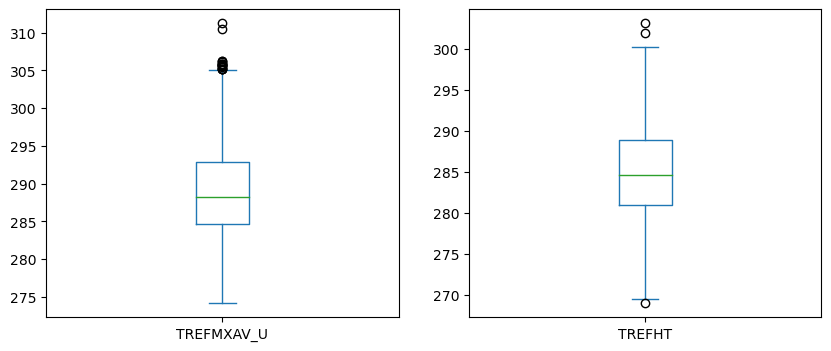

In [17]:
#box TREFMXAV_U and TREFHT
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['TREFMXAV_U'].plot(kind='box')
plt.subplot(1, 2, 2)
df['TREFHT'].plot(kind='box')
plt.show()

In [18]:
#check TREFMXAV_U 
#Excessive value
TREFMXAV_UQ1 = df['TREFMXAV_U'].quantile(0.25)
TREFMXAV_UQ3 = df['TREFMXAV_U'].quantile(0.75)
TREFMXAV_UIQR = TREFMXAV_UQ3 - TREFMXAV_UQ1
upperTREFMXAV_U = TREFMXAV_UQ3 + 1.5 * TREFMXAV_UIQR
checkTREFMXAV_U = df[df['TREFMXAV_U'] > upperTREFMXAV_U]
checkTREFMXAV_U

time  TREFMXAV_U       FLNS       FSNS         PRECT  \
15139 2047-06-25   305.72830  80.341194  295.26196  0.000000e+00   
15140 2047-06-26   305.21286  54.335240  231.12984  3.140393e-08   
19154 2058-06-25   306.22217  80.422930  278.75410  4.164266e-15   
19155 2058-06-26   310.47880  94.500694  284.49716  8.961572e-16   
19156 2058-06-27   311.25726  98.691020  293.14030  5.920009e-11   
19870 2060-06-11   305.42220  51.948910  247.56404  2.338422e-09   
20278 2061-07-24   305.56130  69.067400  265.74005  1.354703e-09   
22139 2066-08-29   305.25504  73.598305  205.52031  2.399008e-11   
23192 2069-07-18   305.20100  63.899900  254.74721  1.285084e-10   
23920 2071-07-16   305.22730  66.212296  278.82828  3.374454e-11   
23921 2071-07-17   306.09335  75.033230  279.47205  1.302938e-09   
23942 2071-08-07   305.74496  53.703370  202.17885  1.004258e-08   
23943 2071-08-08   306.25270  55.888355  215.88530  3.525658e-10   
24261 2072-06-22   305.86673  82.877410  296.68590  1.514349e-09   
24656 2073-07-22   305.56850  84.109300  271.60074  8.288627e-12   
26456 2078-06-27   305.84268  68.368360  284.92210  2.868900e-08   
26500 2078-08-10   305.83330  78.005630  242.37762  7.041989e-11   

               PRSN      QBOT     TREFHT      UBOT      VBOT        lat    lon  
15139  0.000000e+00  0.011821  298.26330 -3.075778 -0.512190  53.246075  357.5  
15140  1.082973e-18  0.013953  299.10565 -1.471345 -1.166411  53.246075  357.5  
19154  0.000000e+00  0.009506  298.64365 -3.725905 -0.582750  53.246075  357.5  
19155  0.000000e+00  0.008551  301.92508 -2.495030 -0.725929  53.246075  357.5  
19156  0.000000e+00  0.008036  303.11798 -4.215083 -1.844028  53.246075  357.5  
19870  1.060842e-16  0.014829  298.98760  0.160285 -1.538028  53.246075  357.5  
20278  0.000000e+00  0.012336  297.75174 -3.292541 -0.792029  53.246075  357.5  
22139  0.000000e+00  0.011218  296.93176 -1.822700  3.047807  53.246075  357.5  
23192  0.000000e+00  0.013295  299.73070 -4.043645  1.709974  53.246075  357.5  
23920  0.000000e+00  0.012876  299.35907  0.468346  2.102326  53.246075  357.5  
23921  0.000000e+00  0.011855  299.76310 -0.633661  1.750202  53.246075  357.5  
23942  6.747769e-18  0.014444  299.01697 -4.517600 -0.638231  53.246075  357.5  
23943  0.000000e+00  0.015222  300.22205 -0.473697  2.456249  53.246075  357.5  
24261  4.707510e-18  0.008824  297.54852 -2.080031  4.287777  53.246075  357.5  
24656  0.000000e+00  0.009819  296.92040 -3.916239 -0.811551  53.246075  357.5  
26456  5.338060e-23  0.011515  299.34192 -0.445640  0.905560  53.246075  357.5  
26500  0.000000e+00  0.009738  298.74150  0.526783 -0.452043  53.246075  357.5

In [19]:
#check whether outlier TREFMXAV_U 

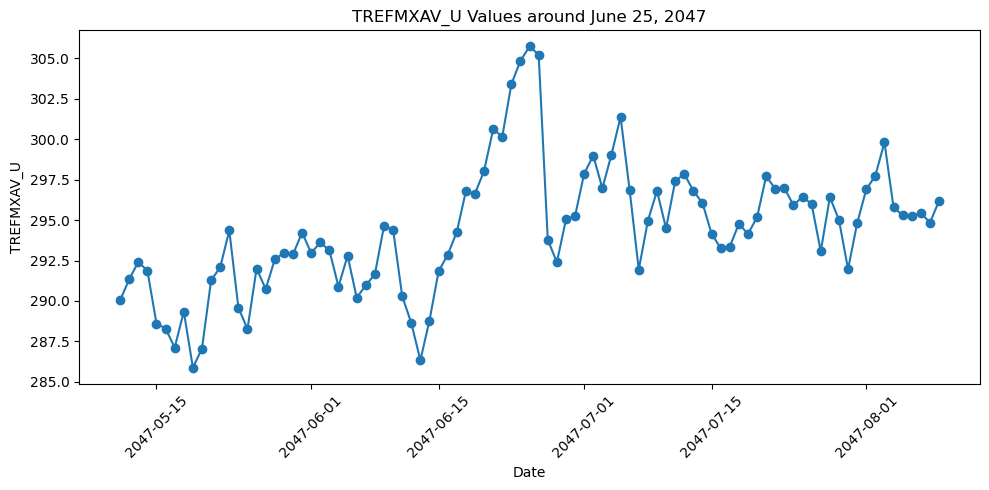

In [20]:
# check 2047-06-25 Way1 
#Draw a line chart for a total of 90 days before and after this date
df.set_index('time', inplace=True)
target_date = pd.to_datetime('2047-06-25')
date_range = pd.Timedelta(days=45)
selected_range = df[(df.index >= target_date - date_range) & (df.index <= target_date + date_range)]
plt.figure(figsize=(10, 5))
plt.plot(selected_range['TREFMXAV_U'], marker='o')
plt.title('TREFMXAV_U Values around June 25, 2047')
plt.xlabel('Date')
plt.ylabel('TREFMXAV_U')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [21]:
# check 2047-06-25 Way2 
# Draw a temperature scatter plot for thirty years on this date

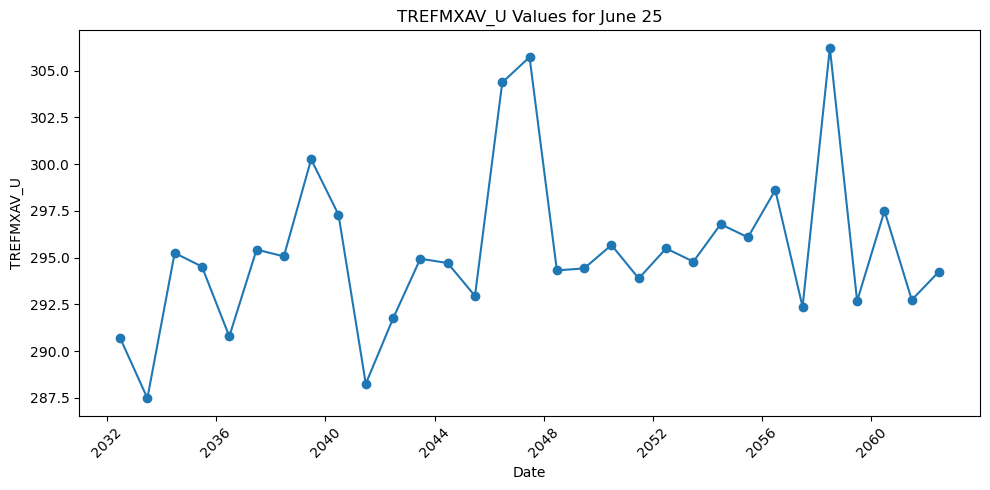

In [23]:
# check 2047-06-25 Way2 
# Draw a temperature scatter plot for thirty years on this date
#df.set_index('time', inplace=True)
#df['time'] = pd.to_datetime(df['time'])
df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
start_year = 2047 - 15
end_year = 2047 + 15
selected_range = df[(df['time'].dt.year>=start_year) & (df['time'].dt.year<=end_year) 
                    & (df['time'].dt.month==6) & (df['time'].dt.day==25)]
selected_range.set_index('time', inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(selected_range['TREFMXAV_U'], marker='o')
plt.title('TREFMXAV_U Values for June 25')
plt.xlabel('Date')
plt.ylabel('TREFMXAV_U')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [24]:
# 2047-06-25 is not outlier

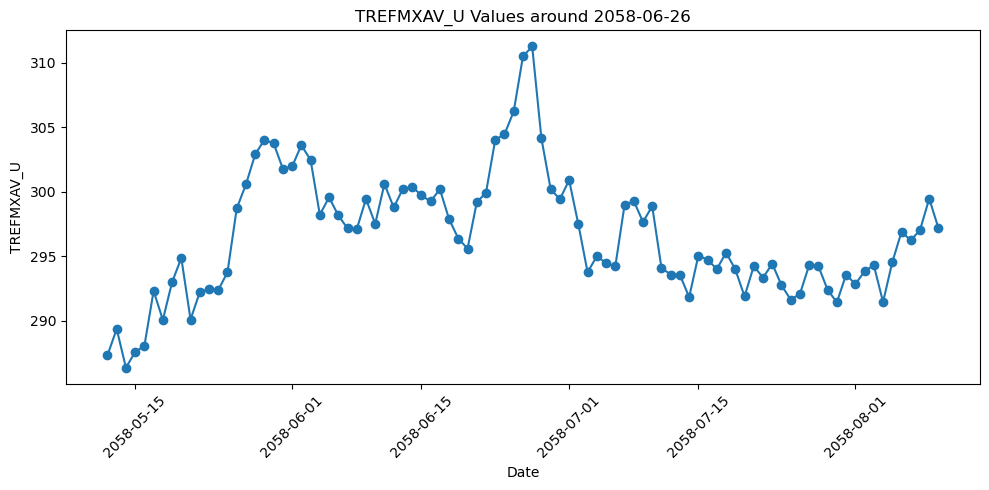

In [25]:
# check 2058-06-26 Way1 
#Draw a line chart for a total of 90 days before and after this date
#df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
target_date = pd.to_datetime('2058-06-26')
date_range = pd.Timedelta(days=45)
selected_range = df[(df.index >= target_date - date_range) & (df.index <= target_date + date_range)]
plt.figure(figsize=(10, 5))
plt.plot(selected_range['TREFMXAV_U'], marker='o')
plt.title('TREFMXAV_U Values around 2058-06-26')
plt.xlabel('Date')
plt.ylabel('TREFMXAV_U')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

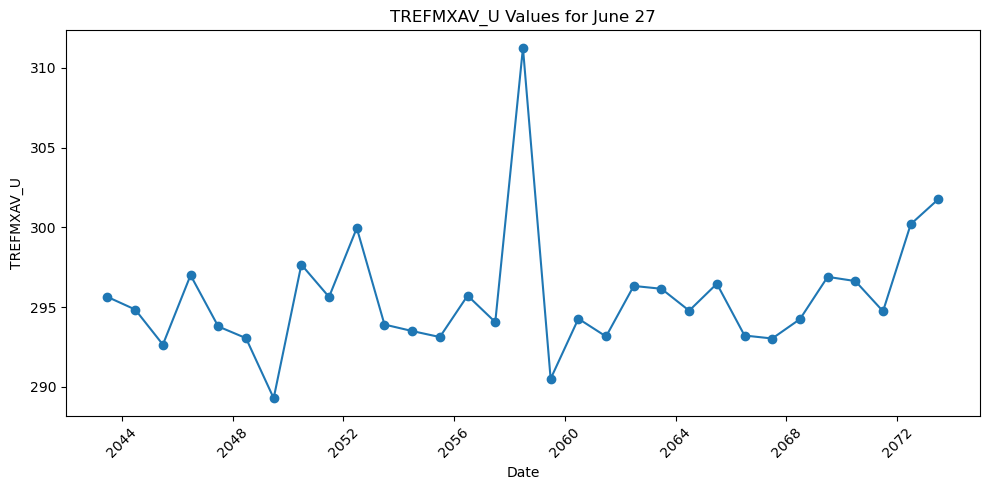

In [27]:
# check 2058-06-27 Way2 
# Draw a temperature scatter plot for thirty years on this date
df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
start_year = 2058 - 15
end_year = 2058 + 15
selected_range = df[(df['time'].dt.year>=start_year) & (df['time'].dt.year<=end_year) & (df['time'].dt.month==6) & (df['time'].dt.day==27)]
selected_range.set_index('time', inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(selected_range['TREFMXAV_U'], marker='o')
plt.title('TREFMXAV_U Values for June 27')
plt.xlabel('Date')
plt.ylabel('TREFMXAV_U')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

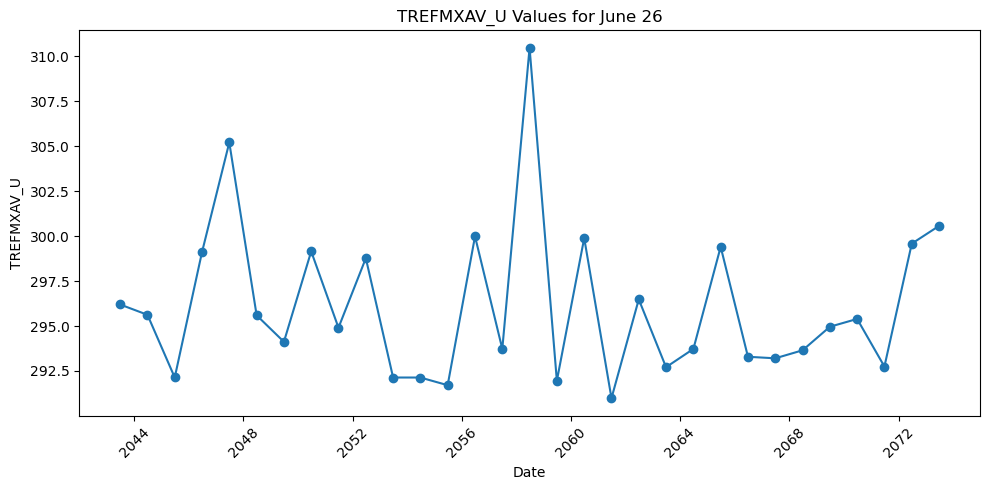

In [28]:
# check 2058-06-26 Way2 
#df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
start_year = 2058 - 15
end_year = 2058 + 15
selected_range = df[(df['time'].dt.year>=start_year) & (df['time'].dt.year<=end_year) & (df['time'].dt.month==6) & (df['time'].dt.day==26)]
selected_range.set_index('time', inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(selected_range['TREFMXAV_U'], marker='o')
plt.title('TREFMXAV_U Values for June 26')
plt.xlabel('Date')
plt.ylabel('TREFMXAV_U')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [29]:
#check TREFHT 
#Excessive value
TREFHTQ1 = df['TREFHT'].quantile(0.25)
TREFHTQ3 = df['TREFHT'].quantile(0.75)
TREFHTIQR = TREFHTQ3 - TREFHTQ1
upperTREFHT = TREFHTQ3 + 1.5 * TREFHTIQR
checkTREFHT = df[df['TREFHT'] > upperTREFHT]
checkTREFHT

time  TREFMXAV_U       FLNS       FSNS         PRECT  PRSN  \
19155 2058-06-26   310.47880  94.500694  284.49716  8.961572e-16   0.0   
19156 2058-06-27   311.25726  98.691020  293.14030  5.920009e-11   0.0   

           QBOT     TREFHT      UBOT      VBOT        lat    lon  
19155  0.008551  301.92508 -2.495030 -0.725929  53.246075  357.5  
19156  0.008036  303.11798 -4.215083 -1.844028  53.246075  357.5

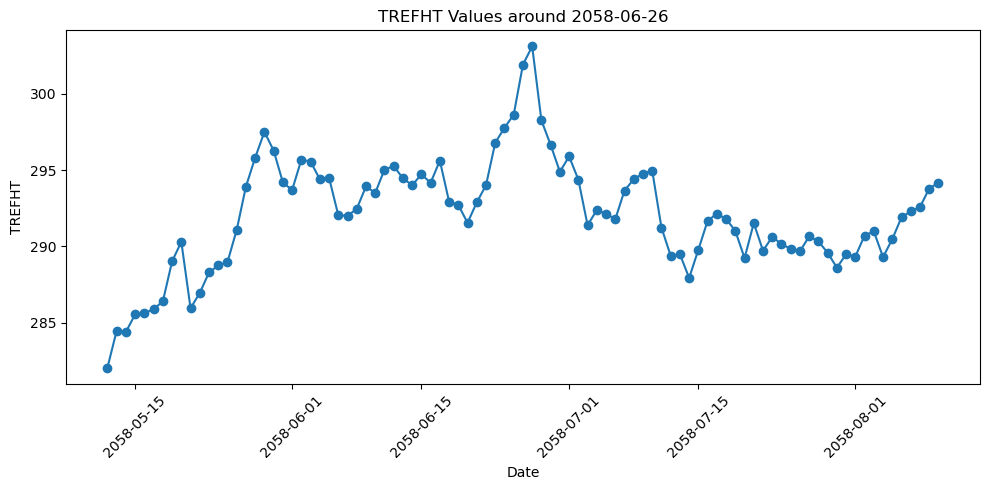

In [30]:
# check 2058-06-26 Way1 
#Draw a line chart for a total of 90 days before and after this date
df.set_index('time', inplace=True)
target_date = pd.to_datetime('2058-06-26')
date_range = pd.Timedelta(days=45)
selected_range = df[(df.index >= target_date - date_range) & (df.index <= target_date + date_range)]
plt.figure(figsize=(10, 5))
plt.plot(selected_range['TREFHT'], marker='o')
plt.title('TREFHT Values around 2058-06-26')
plt.xlabel('Date')
plt.ylabel('TREFHT')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [31]:
#The temperature is not particularly prominent, and based on the TREFMXAV_U value, the situation is consistent

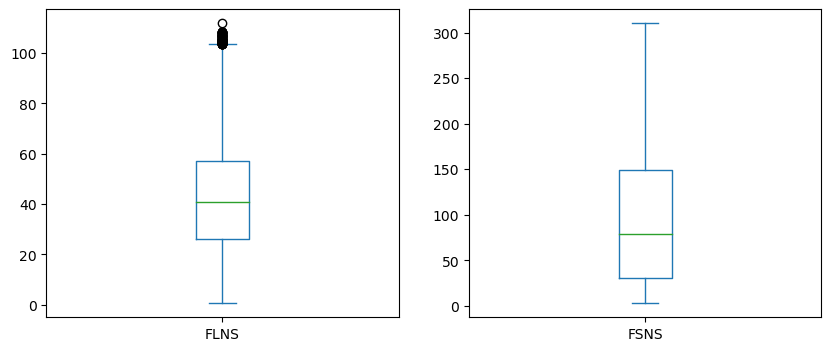

In [32]:
#checkFLNS and FSNS
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['FLNS'].plot(kind='box')
plt.subplot(1, 2, 2)
df['FSNS'].plot(kind='box')
plt.show()

In [33]:
#check FLNS 
#Excessive value
FLNSQ1 = df['FLNS'].quantile(0.25)
FLNSQ3 = df['FLNS'].quantile(0.75)
FLNSIQR = FLNSQ3 - FLNSQ1
upperFLNS = FLNSQ3 + 1.5 * FLNSIQR
checkFLNS = df[df['FLNS'] > upperFLNS]
checkFLNS

TREFMXAV_U        FLNS       FSNS         PRECT          PRSN  \
time                                                                        
2006-04-11   287.17383  105.081660  210.20949  1.157322e-17  0.000000e+00   
2006-05-24   290.38458  103.597800  291.84506  2.996832e-10  0.000000e+00   
2006-05-25   291.57532  104.899956  291.86240  2.357151e-11  0.000000e+00   
2006-05-26   291.87012  104.274020  286.82565  2.490841e-10  0.000000e+00   
2007-04-25   290.92596  108.335440  242.66801  0.000000e+00  0.000000e+00   
2009-05-11   291.47060  107.289190  270.91280  1.791327e-19  0.000000e+00   
2010-05-04   290.91785  105.866300  256.92776  6.392454e-13  0.000000e+00   
2010-05-05   293.07605  106.641820  260.83878  2.525802e-16  0.000000e+00   
2011-05-01   286.59628  103.799270  253.79153  3.995835e-12  5.982495e-19   
2011-05-02   288.41370  104.079180  253.20440  9.165755e-11  2.092301e-18   
2012-06-02   294.57343  107.976720  300.29285  1.063080e-20  0.000000e+00   
2012-06-03   295.89944  108.456420  300.83582  0.000000e+00  0.000000e+00   
2012-06-04   296.47775  106.701360  298.48685  1.012734e-27  0.000000e+00   
2014-03-27   283.36826  105.766130  176.30968  5.589948e-13  0.000000e+00   
2014-03-28   284.90112  105.366390  178.54901  6.201073e-13  2.090068e-17   
2014-04-09   285.79395  103.942320  206.96344  4.794588e-14  0.000000e+00   
2014-04-10   287.32376  107.858110  211.41121  7.470041e-20  0.000000e+00   
2014-05-13   292.03513  111.851400  280.03476  1.601975e-23  0.000000e+00   
2020-04-28   294.38986  106.012530  245.95787  1.758013e-11  0.000000e+00   
2020-04-29   292.19656  106.778206  248.42868  0.000000e+00  0.000000e+00   
2020-04-30   292.94934  104.332726  248.89857  9.698707e-20  0.000000e+00   
2023-04-22   292.32440  105.190180  234.93123  3.410210e-14  0.000000e+00   
2023-05-07   289.95535  107.707640  268.68140  5.349266e-11  0.000000e+00   
2027-05-11   292.81082  105.684000  272.31052  6.110092e-16  0.000000e+00   
2030-05-09   292.65063  103.770800  268.18660  4.064718e-13  0.000000e+00   
2030-06-03   296.03476  104.222480  300.67862  8.971131e-12  0.000000e+00   
2030-07-31   300.95514  106.335380  275.58210  3.987774e-13  0.000000e+00   
2031-05-08   289.38394  104.468910  268.01422  9.913527e-12  0.000000e+00   
2031-05-09   289.54640  104.934810  269.00873  7.322855e-13  5.849578e-21   
2032-05-14   296.19235  103.590110  275.62814  1.101160e-10  0.000000e+00   
2037-06-02   296.36972  104.663400  299.63086  1.663801e-14  0.000000e+00   
2037-06-03   296.10110  105.785970  299.65604  0.000000e+00  0.000000e+00   
2039-05-11   291.81332  104.414690  270.78397  4.198843e-12  0.000000e+00   
2039-05-12   293.45273  104.066246  273.10385  1.033532e-17  0.000000e+00   
2043-05-03   292.05835  107.371284  261.03230  8.709240e-14  0.000000e+00   
2045-04-30   295.82850  106.887610  252.59160  1.554409e-16  0.000000e+00   
2045-05-12   293.11682  108.299420  276.50546  6.377921e-10  0.000000e+00   
2045-05-13   292.41205  105.171440  277.32953  1.001354e-12  0.000000e+00   
2048-05-06   291.84488  103.807470  264.09710  1.098938e-13  1.948958e-22   
2048-05-08   291.96780  105.609150  267.98502  5.437061e-19  0.000000e+00   
2052-06-27   299.95456  108.299540  307.97968  8.955590e-11  0.000000e+00   
2052-06-28   300.72736  108.576740  310.19170  8.917197e-16  0.000000e+00   
2052-06-29   300.69257  106.242615  308.59690  7.997483e-17  0.000000e+00   
2054-06-11   296.82993  103.936226  305.56910  0.000000e+00  0.000000e+00   
2054-06-12   298.99300  104.641815  307.60160  1.396990e-13  0.000000e+00   
2058-05-31   301.77480  103.957670  294.63470  2.806771e-16  0.000000e+00   
2060-06-17   299.00354  108.102410  307.93524  1.476357e-11  0.000000e+00   
2060-06-21   300.80710  106.686584  309.80510  3.203903e-17  0.000000e+00   
2073-06-21   300.88068  107.307020  309.13248  0.000000e+00  0.000000e+00   
2079-04-11   291.55234  103.788620  210.66312  0.000000e+00  0.000000e+00   
2079-04-

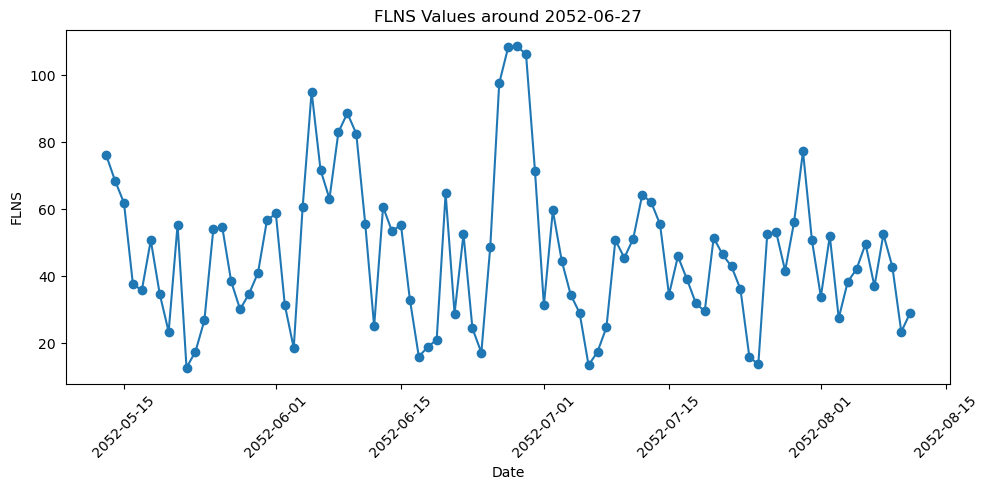

In [34]:
#check FLNS
# check 2052-06-27 Way1 
#Draw a line chart for a total of 90 days before and after this date
df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
target_date = pd.to_datetime('2052-06-27')
date_range = pd.Timedelta(days=45)
selected_range = df[(df.index >= target_date - date_range) & (df.index <= target_date + date_range)]
plt.figure(figsize=(10, 5))
plt.plot(selected_range['FLNS'], marker='o')
plt.title('FLNS Values around 2052-06-27')
plt.xlabel('Date')
plt.ylabel('FLNS')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

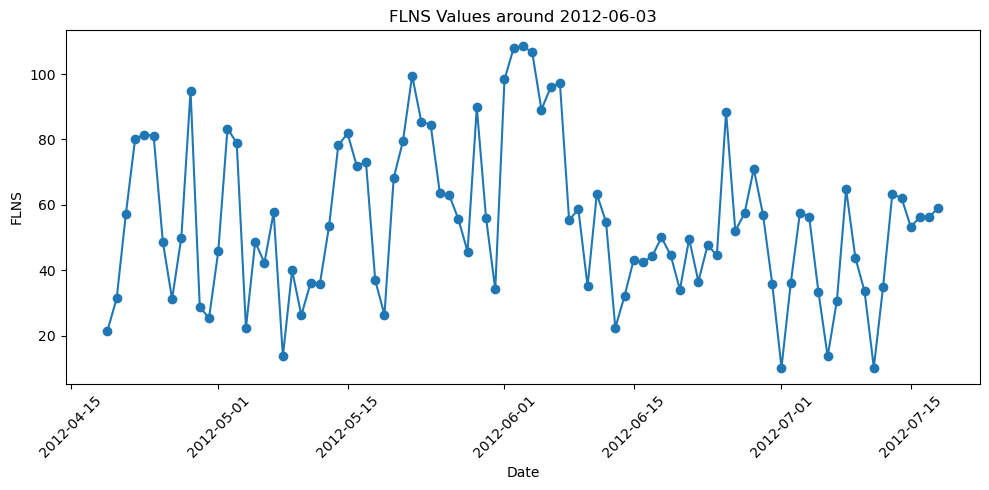

In [35]:
# check 2052-06-27 Way1 
#Draw a line chart for a total of 90 days before and after this date
df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
target_date = pd.to_datetime('2012-06-03')
date_range = pd.Timedelta(days=45)
selected_range = df[(df.index >= target_date - date_range) & (df.index <= target_date + date_range)]
plt.figure(figsize=(10, 5))
plt.plot(selected_range['FLNS'], marker='o')
plt.title('FLNS Values around 2012-06-03')
plt.xlabel('Date')
plt.ylabel('FLNS')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [36]:
#check FSNS 
#Excessive value
FSNSQ1 = df['FSNS'].quantile(0.25)
FSNSQ3 = df['FSNS'].quantile(0.75)
FSNSIQR = FSNSQ3 - FSNSQ1
upperFSNS = FSNSQ3 + 1.5 * FSNSIQR
checkFSNS = df[df['FSNS'] > upperFSNS]
checkFSNS

Empty DataFrame
Columns: [TREFMXAV_U, FLNS, FSNS, PRECT, PRSN, QBOT, TREFHT, UBOT, VBOT, lat, lon]
Index: []

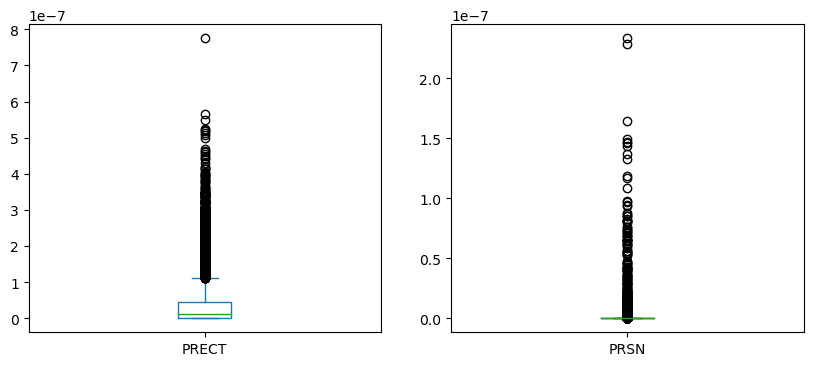

In [37]:
#check PRECT and PRSN
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['PRECT'].plot(kind='box')
plt.subplot(1, 2, 2)
df['PRSN'].plot(kind='box')
plt.show()

In [38]:
PRSNQ1 = df['PRECT'].quantile(0.25)
PRSNQ3 = df['PRECT'].quantile(0.75)
PRSNIQR = PRSNQ3 - PRSNQ1
upperPRSN = PRSNQ3 + 1.5 * PRSNIQR
checkPRECT = df[df['PRECT'] > upperPRSN]
checkPRECT

TREFMXAV_U       FLNS        FSNS         PRECT          PRSN  \
time                                                                        
2006-02-07   286.07278   7.003548   11.331757  1.597908e-07  1.392845e-17   
2006-02-08   279.74290  28.271511   18.588190  1.398343e-07  2.526962e-09   
2006-02-09   283.63403  16.174430   10.775201  1.245045e-07  1.187812e-13   
2006-03-05   287.28015  11.315878   25.032831  1.928114e-07  4.392840e-14   
2006-03-06   285.64246   6.413864   21.234900  2.098340e-07  1.439154e-17   
...                ...        ...         ...           ...           ...   
2080-09-15   292.13873  54.262653  129.525300  1.416855e-07  1.264805e-14   
2080-10-05   292.54605  23.290550   46.658817  2.533610e-07  0.000000e+00   
2080-10-09   291.99097   6.594672    9.767455  3.190530e-07  2.925257e-12   
2080-11-09   285.60208  36.773537   34.250854  1.297134e-07  5.292666e-21   
2080-11-13   290.18222  22.508587   25.103142  1.276924e-07  2.368452e-18   

                QBOT     TREFHT      UBOT      VBOT        lat    lon  
time                                                                   
2006-02-07  0.007035  282.57297  2.798214  2.287317  53.246075  357.5  
2006-02-08  0.004332  277.22320  2.884743  1.293986  53.246075  357.5  
2006-02-09  0.005301  280.52545  4.385131  7.478573  53.246075  357.5  
2006-03-05  0.006816  282.55410  2.237046  5.338605  53.246075  357.5  
2006-03-06  0.007743  283.84247 -0.147283 -0.873315  53.246075  357.5  
...              ...        ...       ...       ...        ...    ...  
2080-09-15  0.007775  289.21365  4.532440  3.160763  53.246075  357.5  
2080-10-05  0.008421  286.38803  1.965572  3.453003  53.246075  357.5  
2080-10-09  0.011488  290.09750  0.446298  1.603618  53.246075  357.5  
2080-11-09  0.006492  283.33545  3.394442  0.456285  53.246075  357.5  
2080-11-13  0.008751  285.93747  2.526892  5.605828  53.246075  357.5  

[1974 rows x 11 columns]

In [39]:
checkPRECT = checkPRECT.sort_values(by='PRECT', ascending=False)
checkPRECT

TREFMXAV_U       FLNS        FSNS         PRECT          PRSN  \
time                                                                        
2072-10-27   288.83270  11.722380   21.371674  7.752961e-07  0.000000e+00   
2042-09-06   290.66974   6.763406   15.174319  5.653763e-07  1.767296e-12   
2076-06-26   291.76500  12.015245   53.795998  5.483982e-07  5.391122e-15   
2016-07-21   288.06628  17.202654   89.461820  5.245394e-07  0.000000e+00   
2055-07-03   292.12238  16.436644   79.646520  5.219644e-07  0.000000e+00   
...                ...        ...         ...           ...           ...   
2077-05-05   290.60718  50.965650  153.753770  1.127853e-07  2.494764e-17   
2038-08-24   292.84680  11.791274   46.591560  1.127843e-07  9.813259e-17   
2025-06-19   288.82540  13.097985   59.031452  1.127795e-07  4.150410e-14   
2043-07-22   290.98140  27.634903   87.057670  1.127712e-07  2.284945e-13   
2027-03-18   284.73480  19.861073   41.283287  1.127568e-07  1.571515e-12   

                QBOT     TREFHT      UBOT      VBOT        lat    lon  
time                                                                   
2072-10-27  0.009360  286.47380 -4.806425 -6.386984  53.246075  357.5  
2042-09-06  0.010884  288.97740 -0.624154 -4.385648  53.246075  357.5  
2076-06-26  0.011604  290.07960 -4.952559 -2.314005  53.246075  357.5  
2016-07-21  0.008949  286.58112  4.179211 -2.913099  53.246075  357.5  
2055-07-03  0.010158  289.74570  0.890340 -4.749915  53.246075  357.5  
...              ...        ...       ...       ...        ...    ...  
2077-05-05  0.006073  285.79807  3.940021  1.620527  53.246075  357.5  
2038-08-24  0.011168  290.87323  0.498360  4.880576  53.246075  357.5  
2025-06-19  0.008828  286.72903  3.454029  1.720063  53.246075  357.5  
2043-07-22  0.008908  288.04193 -3.291886 -2.345724  53.246075  357.5  
2027-03-18  0.005845  281.83734 -5.133763  5.397356  53.246075  357.5  

[1974 rows x 11 columns]

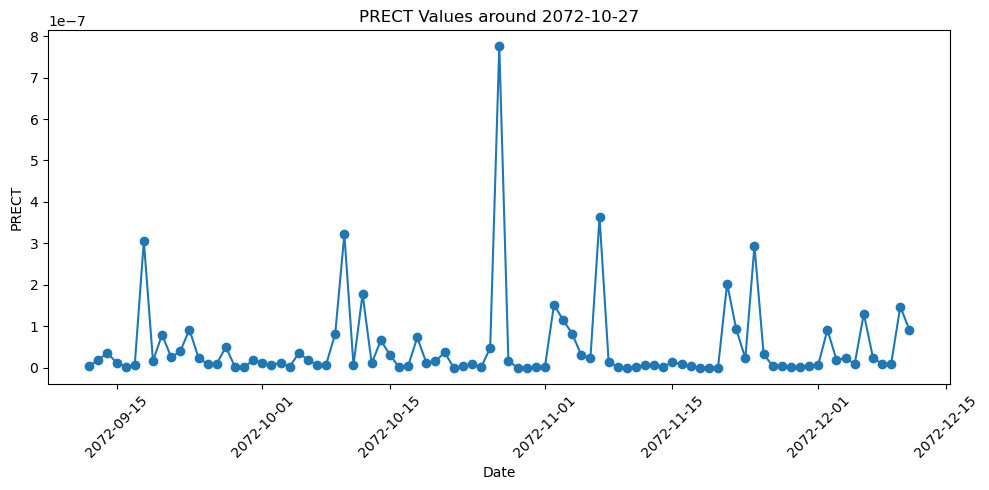

In [40]:
# check 2072-10-27 Way1 
#Draw a line chart for a total of 90 days before and after this date
df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
target_date = pd.to_datetime('2072-10-27')
date_range = pd.Timedelta(days=45)
selected_range = df[(df.index >= target_date - date_range) & (df.index <= target_date + date_range)]
plt.figure(figsize=(10, 5))
plt.plot(selected_range['PRECT'], marker='o')
plt.title('PRECT Values around 2072-10-27')
plt.xlabel('Date')
plt.ylabel('PRECT')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

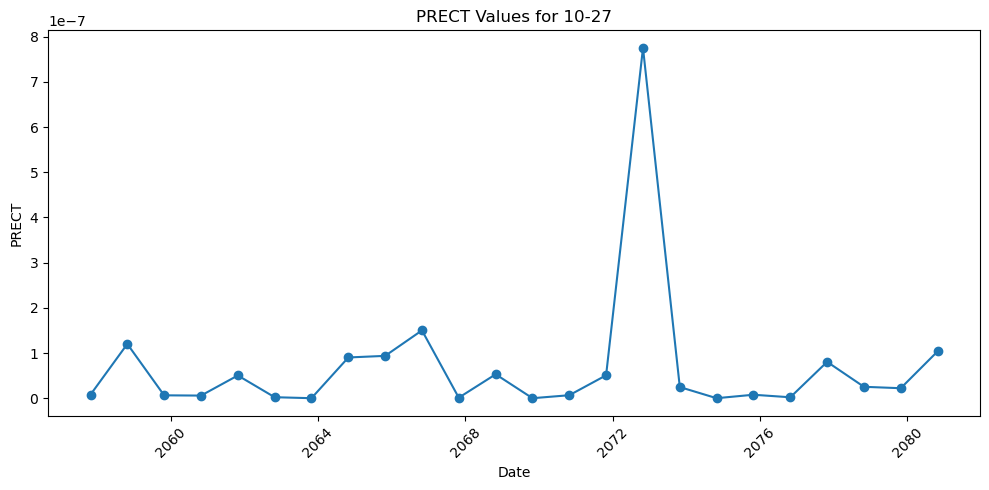

In [42]:
# check 2072-10-27 Way2 
df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
start_year = 2072 - 15
end_year = 2072 + 15
selected_range = df[(df['time'].dt.year>=start_year) & (df['time'].dt.year<=end_year) & (df['time'].dt.month==10) & (df['time'].dt.day==27)]
selected_range.set_index('time', inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(selected_range['PRECT'], marker='o')
plt.title('PRECT Values for 10-27')
plt.xlabel('Date')
plt.ylabel('PRECT')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

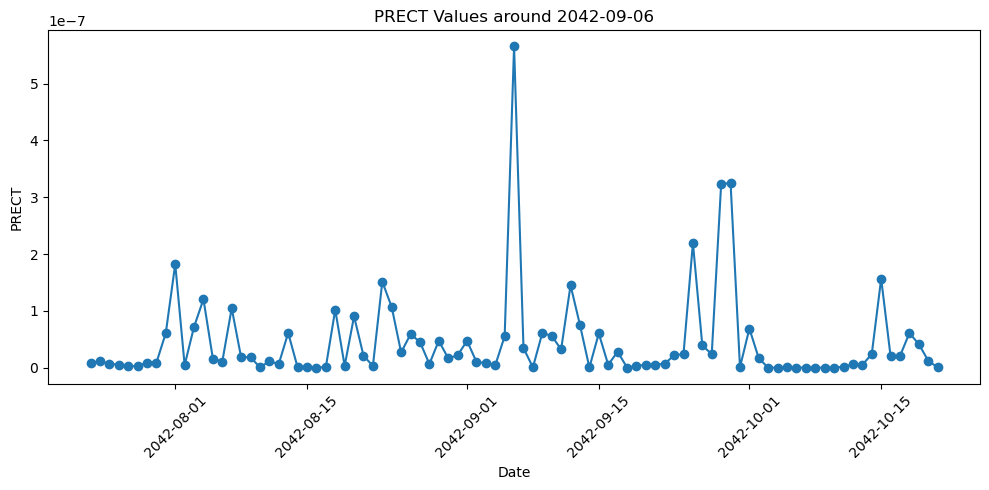

In [43]:
# check 2042-09-06 Way1 
#Draw a line chart for a total of 90 days before and after this date
df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
target_date = pd.to_datetime('2042-09-06')
date_range = pd.Timedelta(days=45)
selected_range = df[(df.index >= target_date - date_range) & (df.index <= target_date + date_range)]
plt.figure(figsize=(10, 5))
plt.plot(selected_range['PRECT'], marker='o')
plt.title('PRECT Values around 2042-09-06')
plt.xlabel('Date')
plt.ylabel('PRECT')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

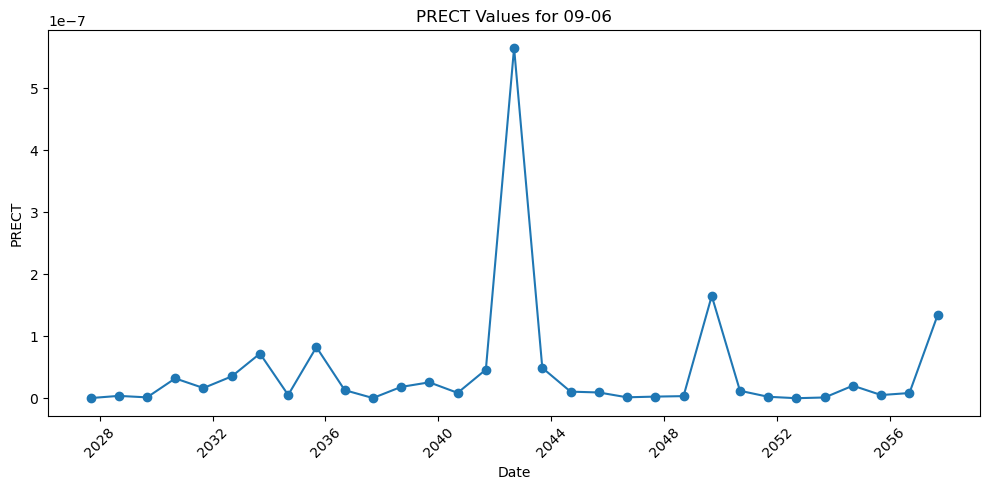

In [44]:
# check 2042-09-06 Way2 
df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])
start_year = 2042 - 15
end_year = 2042 + 15
selected_range = df[(df['time'].dt.year>=start_year) & (df['time'].dt.year<=end_year) & (df['time'].dt.month==9) & (df['time'].dt.day==6)]
selected_range.set_index('time', inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(selected_range['PRECT'], marker='o')
plt.title('PRECT Values for 09-06')
plt.xlabel('Date')
plt.ylabel('PRECT')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [45]:
df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])

In [46]:
#wind
# Split 'UBOT' into eastward and westward components
df['EastWind'] = df['UBOT'].apply(lambda x: max(x, 0))
df['WestWind'] = df['UBOT'].apply(lambda x: -min(x, 0))

# Split 'VBOT' into northward and southward components
df['NorthWind'] = df['VBOT'].apply(lambda x: max(x, 0))
df['SouthWind'] = df['VBOT'].apply(lambda x: -min(x, 0))

df.drop(['UBOT', 'VBOT'], axis=1, inplace=True)

In [47]:
##################################

In [48]:
from scipy import stats
import seaborn as sns
import sklearn as sk
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
sns.set_style("whitegrid", {'axes.grid': False})

%matplotlib inline

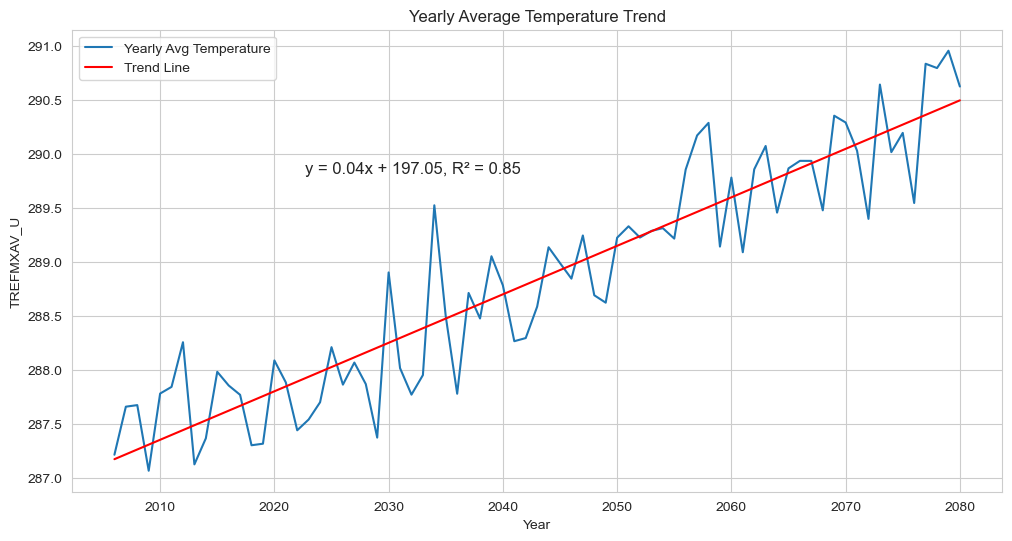

In [49]:
#Annual average temperature change curve
df.set_index('time', inplace=True)

yearly_avg_temp = df['TREFMXAV_U'].resample('Y').mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp.index.year, yearly_avg_temp, label='Yearly Avg Temperature')

X = yearly_avg_temp.index.year.values.reshape(-1, 1)  # Reshape for sklearn
y = yearly_avg_temp.values
model = LinearRegression()
model.fit(X, y)

trend_line = model.predict(X)
plt.plot(yearly_avg_temp.index.year, trend_line, label='Trend Line', color='red')

r_squared = r2_score(y, trend_line)
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}, R² = {r_squared:.2f}'

plt.text(0.25, 0.70, equation, ha='left', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.title('Yearly Average Temperature Trend')
plt.xlabel('Year')
plt.ylabel('TREFMXAV_U')
plt.legend()
plt.grid(True)
plt.show()

df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])

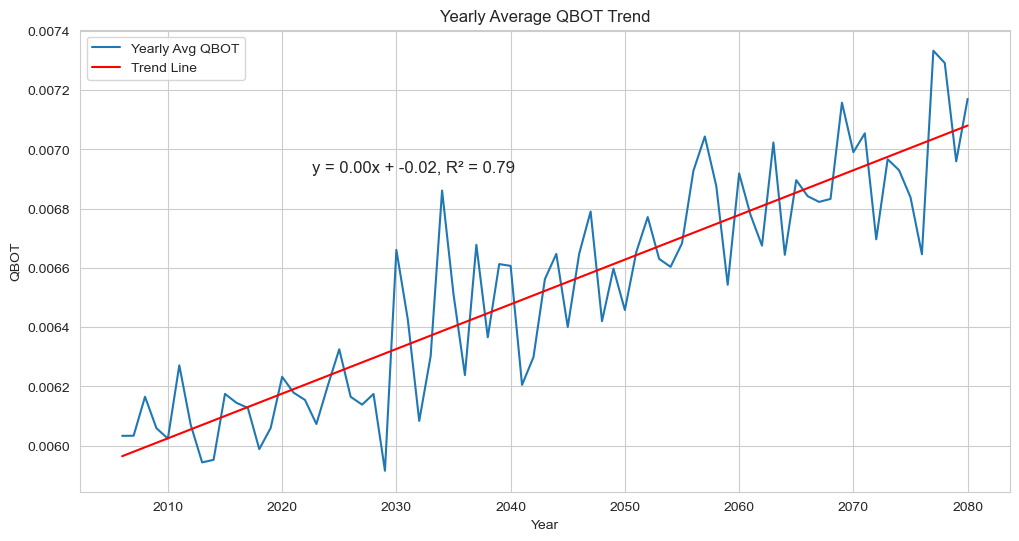

In [50]:
#Annual average QBOT change curve
df.set_index('time', inplace=True)

yearly_avg_QBOT = df['QBOT'].resample('Y').mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_QBOT.index.year, yearly_avg_QBOT, label='Yearly Avg QBOT')

X = yearly_avg_QBOT.index.year.values.reshape(-1, 1)  # Reshape for sklearn
y = yearly_avg_QBOT.values
model = LinearRegression()
model.fit(X, y)

trend_line = model.predict(X)
plt.plot(yearly_avg_QBOT.index.year, trend_line, label='Trend Line', color='red')

r_squared = r2_score(y, trend_line)
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}, R² = {r_squared:.2f}'

plt.text(0.25, 0.70, equation, ha='left', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.title('Yearly Average QBOT Trend')
plt.xlabel('Year')
plt.ylabel('QBOT')
plt.legend()
plt.grid(True)
plt.show()

df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])

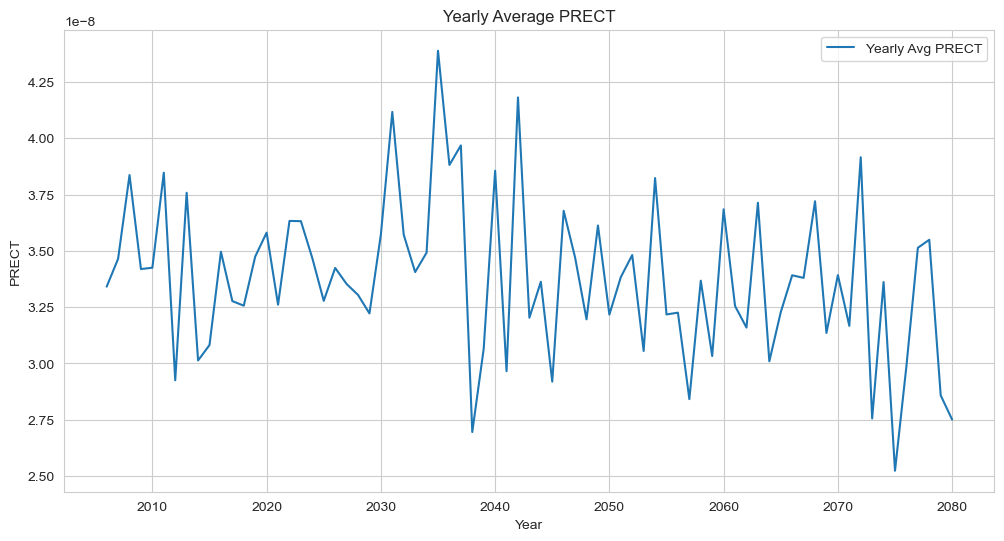

In [51]:
#Annual average PRECT change curve
df.set_index('time', inplace=True)

yearly_avg_PRECT = df['PRECT'].resample('Y').mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_PRECT.index.year, yearly_avg_PRECT, label='Yearly Avg PRECT')

X = yearly_avg_PRECT.index.year.values.reshape(-1, 1) 
y = yearly_avg_PRECT.values
#model = LinearRegression()
#model.fit(X, y)

#trend_line = model.predict(X)
#plt.plot(yearly_avg_PRECT.index.year, trend_line, label='Trend Line', color='red')

#r_squared = r2_score(y, trend_line)
#equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}, R² = {r_squared:.2f}'

#plt.text(0.25, 0.70, equation, ha='left', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.title('Yearly Average PRECT')
plt.xlabel('Year')
plt.ylabel('PRECT')
plt.legend()
plt.grid(True)
plt.show()

df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])

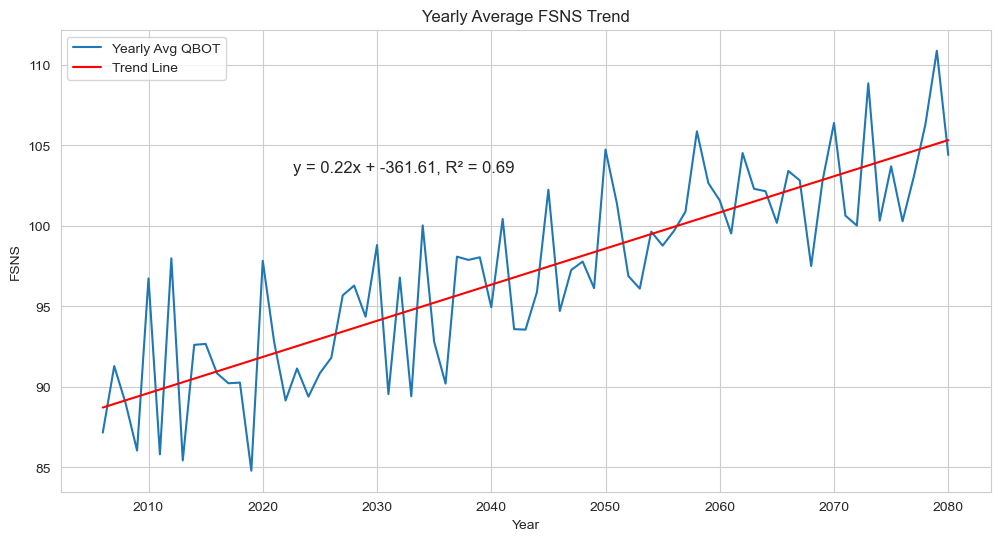

In [52]:
#Annual average FSNS change curve
df.set_index('time', inplace=True)

yearly_avg_FSNS = df['FSNS'].resample('Y').mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_FSNS.index.year, yearly_avg_FSNS, label='Yearly Avg QBOT')

X = yearly_avg_FSNS.index.year.values.reshape(-1, 1)  # Reshape for sklearn
y = yearly_avg_FSNS.values
model = LinearRegression()
model.fit(X, y)

trend_line = model.predict(X)
plt.plot(yearly_avg_FSNS.index.year, trend_line, label='Trend Line', color='red')

r_squared = r2_score(y, trend_line)
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}, R² = {r_squared:.2f}'

plt.text(0.25, 0.70, equation, ha='left', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.title('Yearly Average FSNS Trend')
plt.xlabel('Year')
plt.ylabel('FSNS')
plt.legend()
plt.grid(True)
plt.show()

df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])

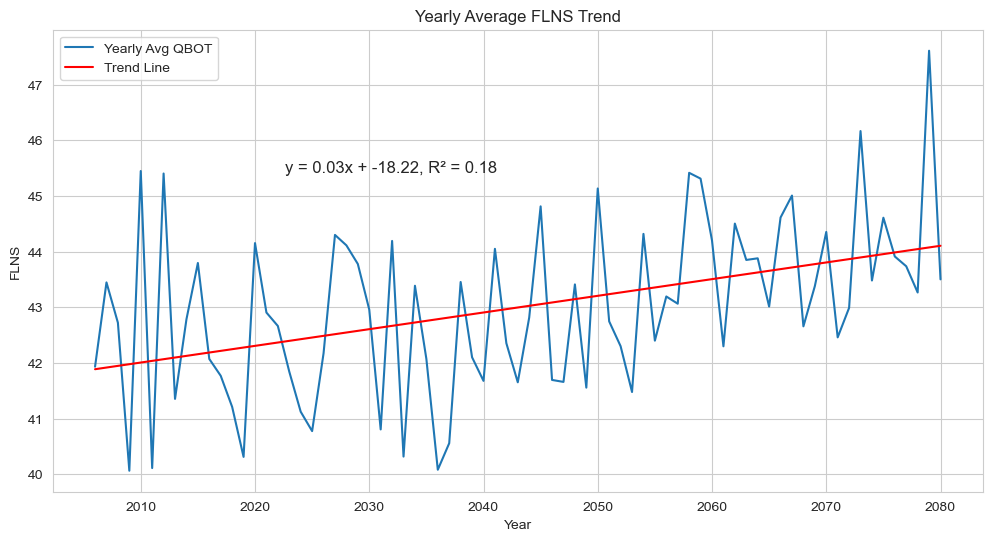

In [53]:
#Annual average FLNS change curve
df.set_index('time', inplace=True)

yearly_avg_FLNS = df['FLNS'].resample('Y').mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_FLNS.index.year, yearly_avg_FLNS, label='Yearly Avg QBOT')

X = yearly_avg_FLNS.index.year.values.reshape(-1, 1)  # Reshape for sklearn
y = yearly_avg_FLNS.values
model = LinearRegression()
model.fit(X, y)

trend_line = model.predict(X)
plt.plot(yearly_avg_FLNS.index.year, trend_line, label='Trend Line', color='red')

r_squared = r2_score(y, trend_line)
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}, R² = {r_squared:.2f}'

plt.text(0.25, 0.70, equation, ha='left', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.title('Yearly Average FLNS Trend')
plt.xlabel('Year')
plt.ylabel('FLNS')
plt.legend()
plt.grid(True)
plt.show()

df.reset_index(inplace=True)
df['time'] = pd.to_datetime(df['time'])

In [54]:
correlation_matrix = df.corr()

TREFMXAV_U_correlation = correlation_matrix['TREFMXAV_U'].sort_values(ascending=False)
TREFMXAV_U_correlation

TREFMXAV_U    1.000000
TREFHT        0.967620
QBOT          0.791619
FSNS          0.721310
FLNS          0.219688
time          0.188005
level_0       0.188002
index         0.188002
WestWind      0.066798
SouthWind     0.003721
PRECT        -0.103835
PRSN         -0.116976
NorthWind    -0.167811
EastWind     -0.202146
lat                NaN
lon                NaN
Name: TREFMXAV_U, dtype: float64

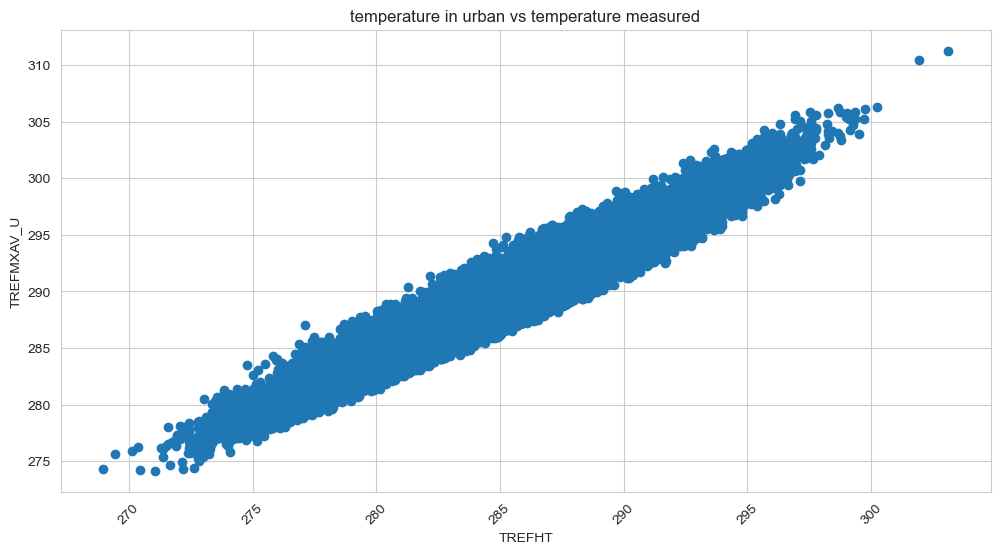

In [55]:
plt.figure(figsize=(12, 6))
plt.scatter(df['TREFHT'], df['TREFMXAV_U'], marker='o')
plt.title('temperature in urban vs temperature measured')
plt.xlabel('TREFHT')
plt.ylabel('TREFMXAV_U')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

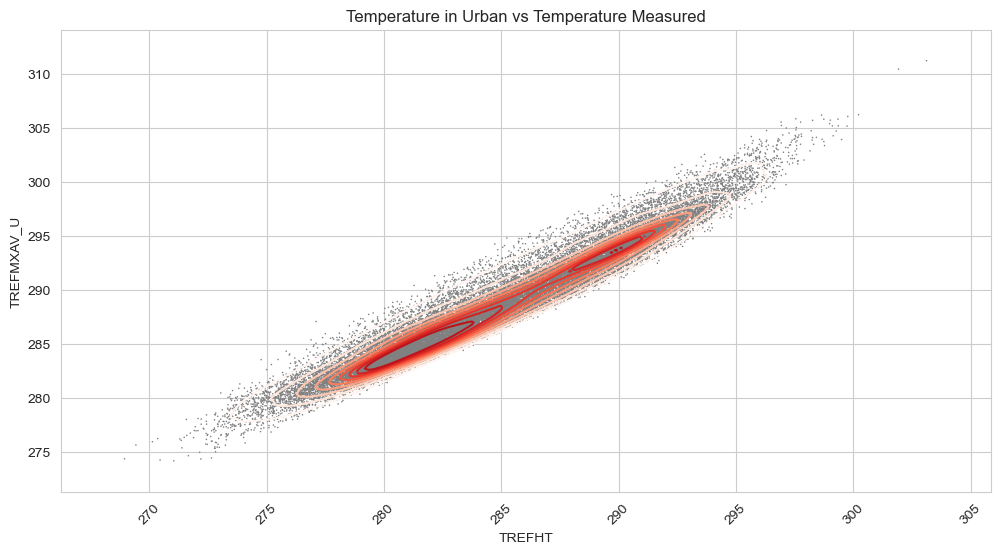

In [56]:
np.random.seed(10)
X = df['TREFHT'].values
Y = df['TREFMXAV_U'].values

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")

# Use sns.kdeplot with the correct parameters
sns.kdeplot(x=X, y=Y, cmap="Reds", fill=False)  # shade=False for no fill

plt.title('Temperature in Urban vs Temperature Measured')
plt.xlabel('TREFHT')
plt.ylabel('TREFMXAV_U')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [57]:
res_TREFHT_TREFMXAV_U = stats.pearsonr(df['TREFHT'], df['TREFMXAV_U'])
res_TREFHT_TREFMXAV_U

PearsonRResult(statistic=0.9676202374231692, pvalue=0.0)

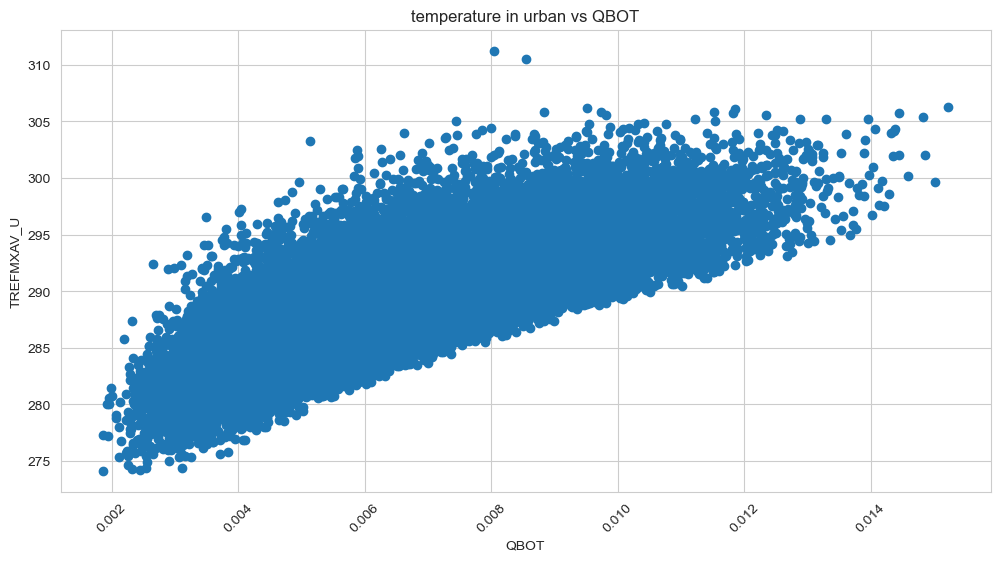

In [58]:
plt.figure(figsize=(12, 6))
plt.scatter(df['QBOT'], df['TREFMXAV_U'], marker='o')
plt.title('temperature in urban vs QBOT')
plt.xlabel('QBOT')
plt.ylabel('TREFMXAV_U')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

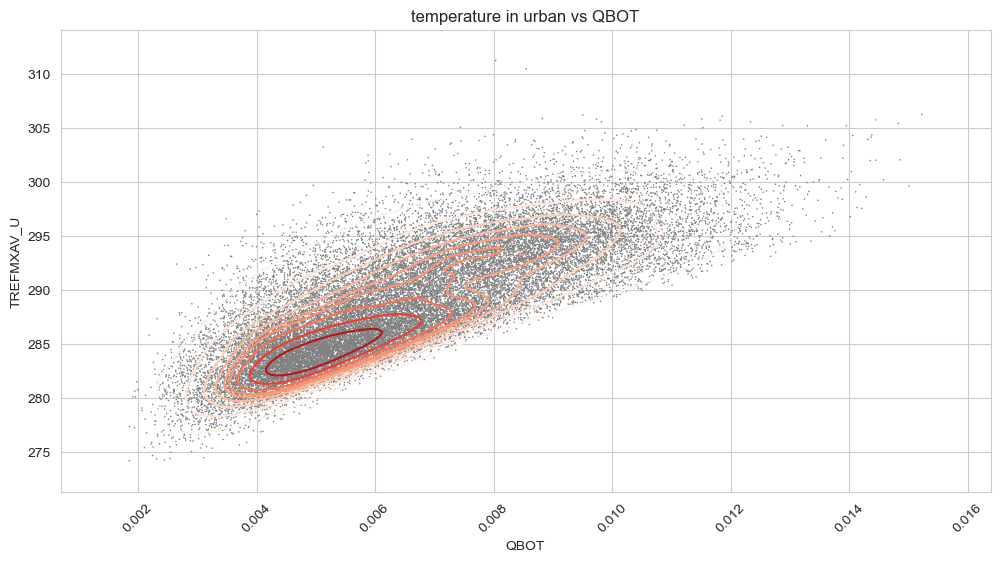

In [59]:
np.random.seed(10)
X = df['QBOT'].values
Y = df['TREFMXAV_U'].values

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")

# Use sns.kdeplot with the correct parameters
sns.kdeplot(x=X, y=Y, cmap="Reds", fill=False)  # shade=False for no fill

plt.title('temperature in urban vs QBOT')
plt.xlabel('QBOT')
plt.ylabel('TREFMXAV_U')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [60]:
res_QBOT_TREFMXAV_U = stats.pearsonr(df['QBOT'], df['TREFMXAV_U'])
res_QBOT_TREFMXAV_U

PearsonRResult(statistic=0.7916194367847122, pvalue=0.0)

In [61]:
res2_QBOT_TREFMXAV_U = stats.spearmanr(df['QBOT'], df['TREFMXAV_U'])
res2_QBOT_TREFMXAV_U

SignificanceResult(statistic=0.8029838052048074, pvalue=0.0)

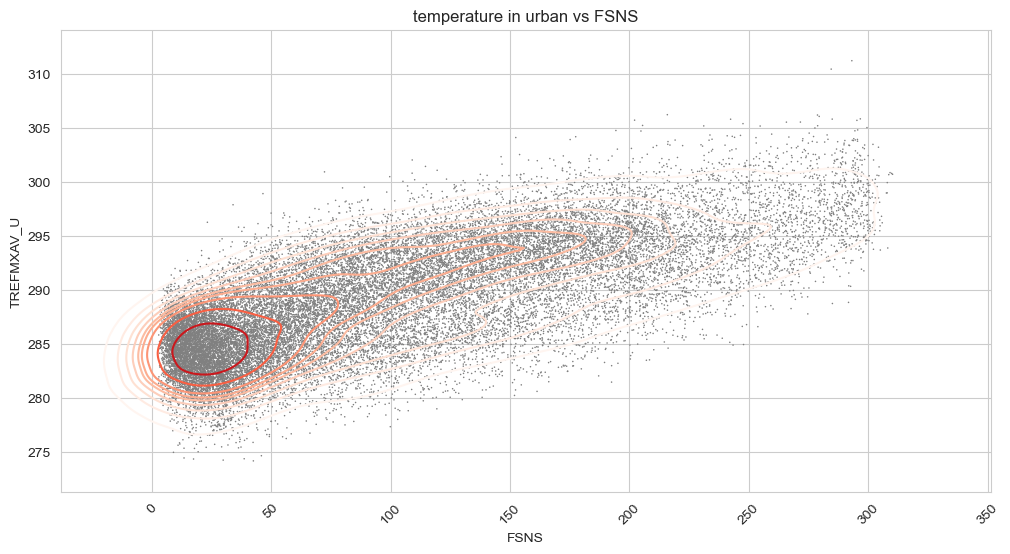

In [62]:
np.random.seed(10)


X = df['FSNS'].values
Y = df['TREFMXAV_U'].values

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")

# Use sns.kdeplot with the correct parameters
sns.kdeplot(x=X, y=Y, cmap="Reds", fill=False)  # shade=False for no fill

plt.title('temperature in urban vs FSNS')
plt.xlabel('FSNS')
plt.ylabel('TREFMXAV_U')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [63]:
res_FSNS_TREFMXAV_U = stats.pearsonr(df['FSNS'], df['TREFMXAV_U'])
res_FSNS_TREFMXAV_U

PearsonRResult(statistic=0.7213101478352806, pvalue=0.0)

In [64]:
res_FSNS_TREFMXAV_U = stats.spearmanr(df['FSNS'], df['TREFMXAV_U'])
res_FSNS_TREFMXAV_U

SignificanceResult(statistic=0.714232583508109, pvalue=0.0)

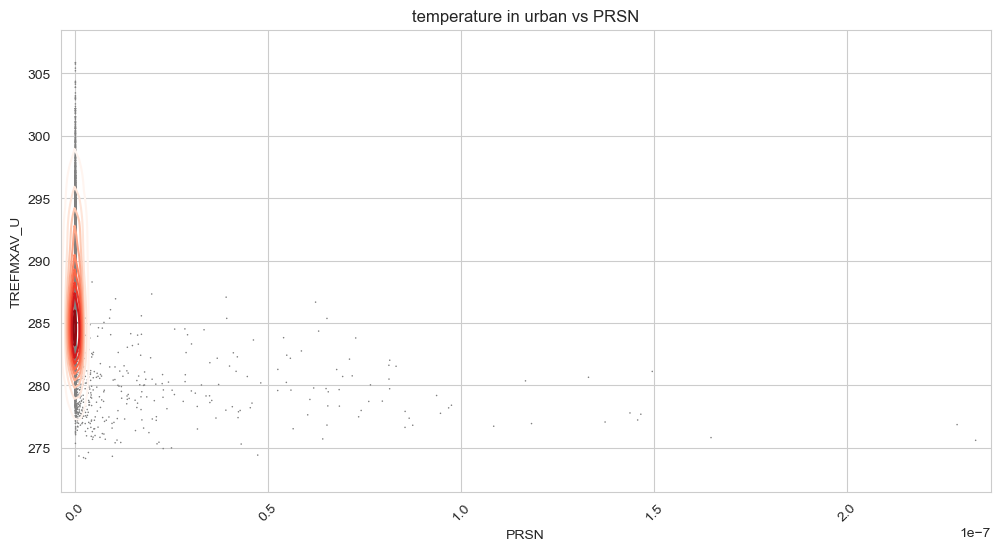

In [65]:
df_filtered = df[df['PRSN'] != 0]
np.random.seed(10)
X = df_filtered['PRSN'].values
Y = df_filtered['TREFMXAV_U'].values

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")

# Use sns.kdeplot with the correct parameters
sns.kdeplot(x=X, y=Y, cmap="Reds", fill=False)  # shade=False for no fill

plt.title('temperature in urban vs PRSN')
plt.xlabel('PRSN')
plt.ylabel('TREFMXAV_U')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

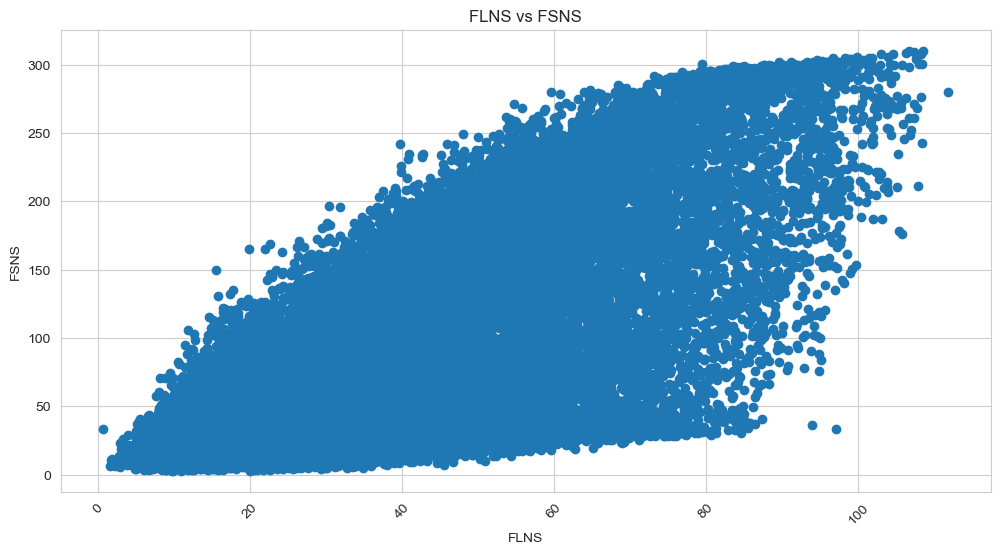

In [66]:
plt.figure(figsize=(12, 6))
plt.scatter(df['FLNS'], df['FSNS'], marker='o')
plt.title('FLNS vs FSNS')
plt.xlabel('FLNS')
plt.ylabel('FSNS')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

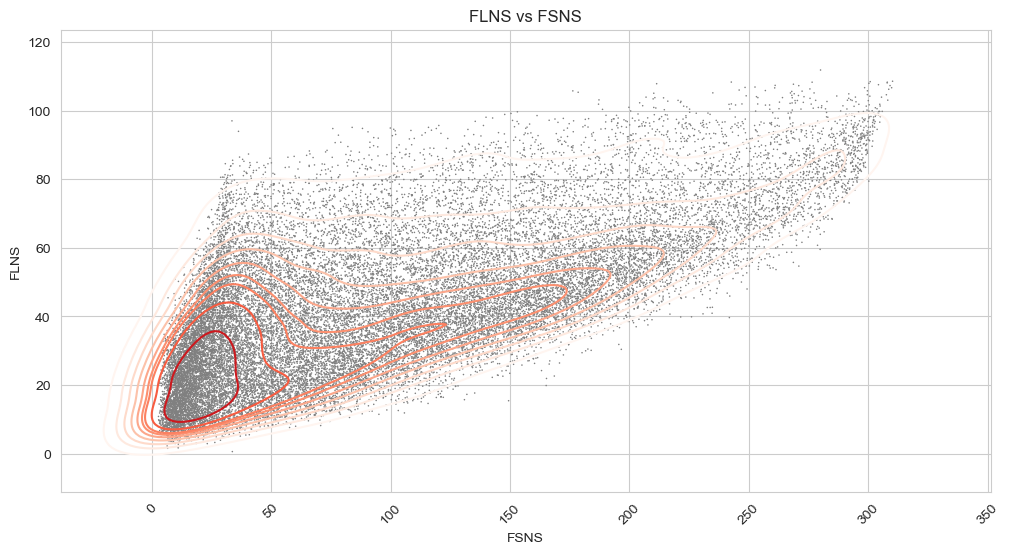

In [67]:
X = df['FSNS'].values
Y = df['FLNS'].values

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")

sns.kdeplot(x=X, y=Y, cmap="Reds", fill=False) 

plt.title('FLNS vs FSNS')
plt.xlabel('FSNS')
plt.ylabel('FLNS')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [68]:
res2_FSNS_FLNS = stats.spearmanr(df['FSNS'], df['FLNS'])
res2_FSNS_FLNS

SignificanceResult(statistic=0.6650500296622467, pvalue=0.0)

In [69]:
res_FSNS_FLNS = stats.pearsonr(df['FSNS'], df['FLNS'])
res_FSNS_FLNS

PearsonRResult(statistic=0.6836270757048333, pvalue=0.0)

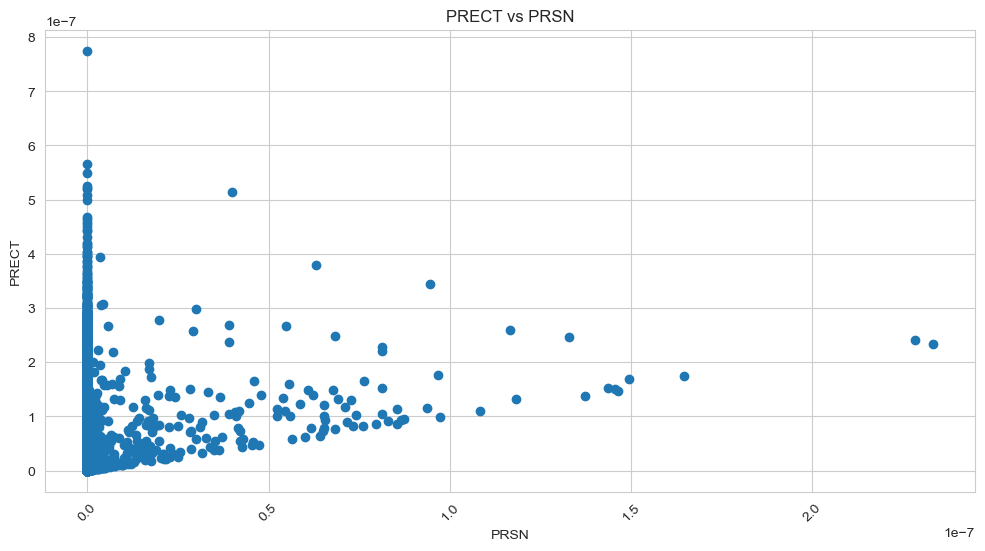

In [70]:
plt.figure(figsize=(12, 6))
plt.scatter(df['PRSN'], df['PRECT'], marker='o')
plt.title('PRECT vs PRSN')
plt.xlabel('PRSN')
plt.ylabel('PRECT')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

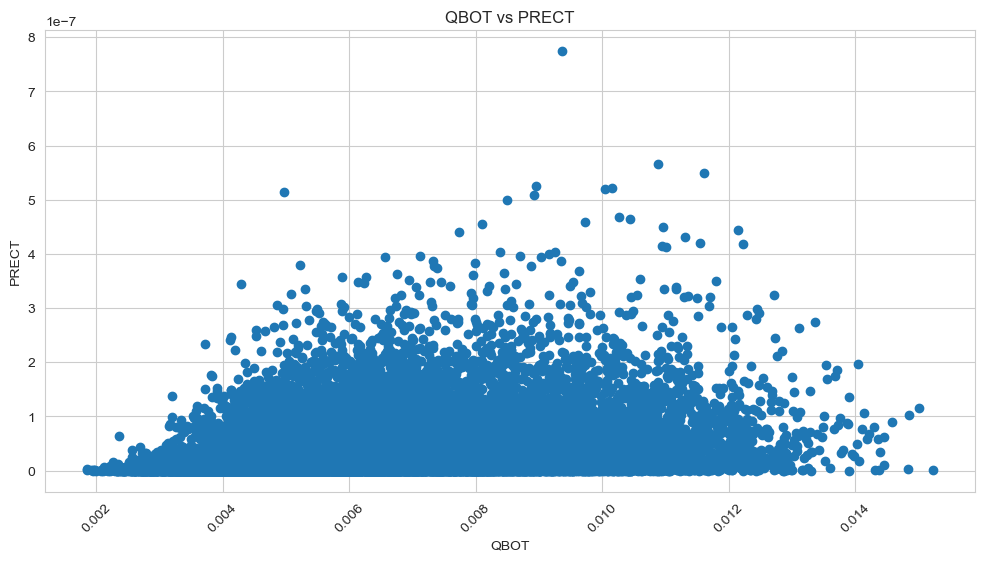

In [71]:
plt.figure(figsize=(12, 6))
plt.scatter(df['QBOT'], df['PRECT'], marker='o')
plt.title('QBOT vs PRECT')
plt.xlabel('QBOT')
plt.ylabel('PRECT')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [72]:
res2_QBOT_PRECT = stats.spearmanr(df['QBOT'], df['PRECT'])
res2_QBOT_PRECT

SignificanceResult(statistic=0.23945574696189306, pvalue=0.0)

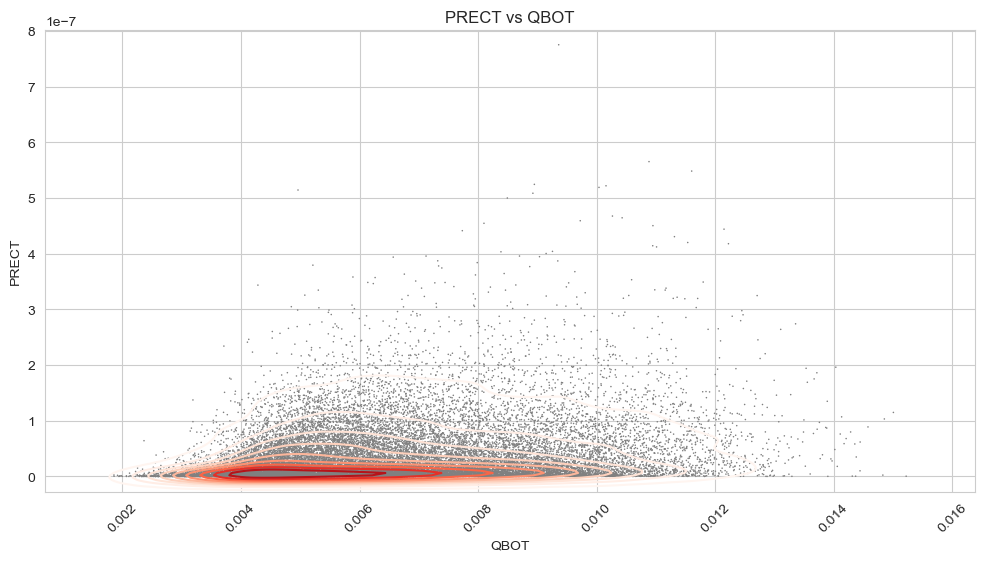

In [73]:
X = df['QBOT'].values
Y = df['PRECT'].values

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")

sns.kdeplot(x=X, y=Y, cmap="Reds", fill=False) 

plt.title('PRECT vs QBOT')
plt.xlabel('QBOT')
plt.ylabel('PRECT')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

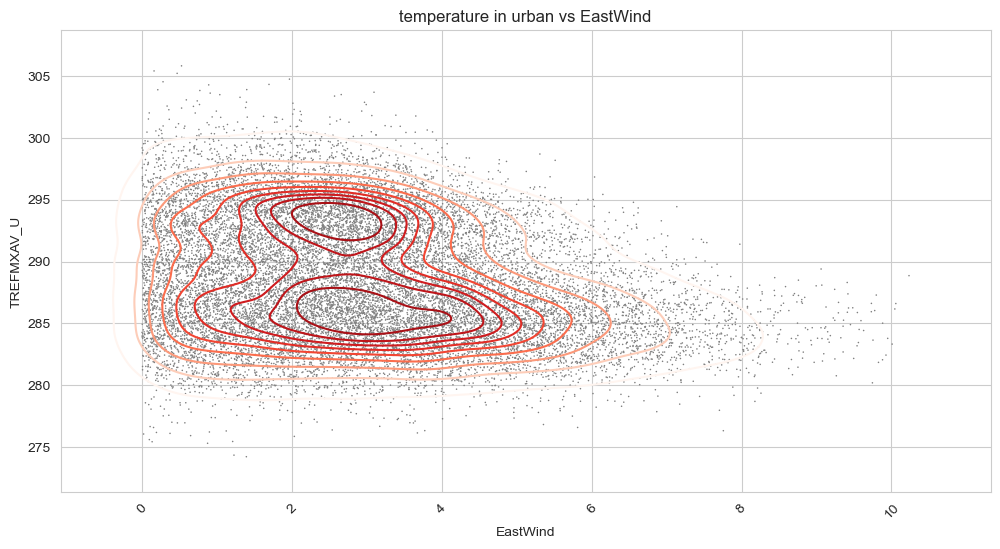

In [74]:
df_filtered = df[df['EastWind'] != 0]

X = df_filtered['EastWind'].values
Y = df_filtered['TREFMXAV_U'].values

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")

sns.kdeplot(x=X, y=Y, cmap="Reds", fill=False)  

plt.title('temperature in urban vs EastWind')
plt.xlabel('EastWind')
plt.ylabel('TREFMXAV_U')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [75]:
res_EastWind_TREFMXAV_U = stats.spearmanr(df_filtered['EastWind'], df_filtered['TREFMXAV_U'])
res_EastWind_TREFMXAV_U

SignificanceResult(statistic=-0.2146657339158552, pvalue=1.9504546869135863e-186)

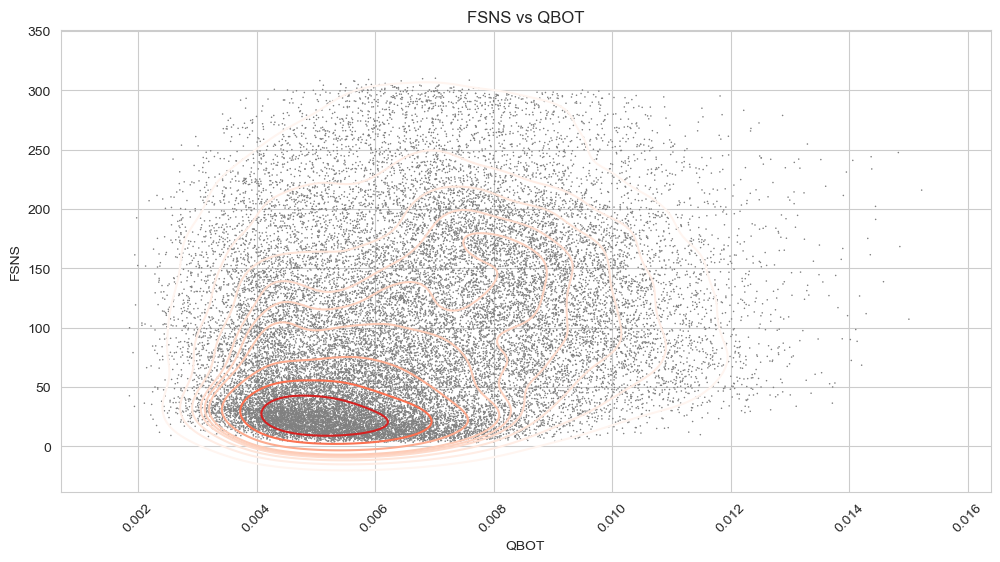

In [76]:
X = df['QBOT'].values
Y = df['FSNS'].values

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")

sns.kdeplot(x=X, y=Y, cmap="Reds", fill=False) 

plt.title('FSNS vs QBOT')
plt.xlabel('QBOT')
plt.ylabel('FSNS')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [77]:
correlation_matrix = df.corr()

FSNS_correlation = correlation_matrix['FSNS'].sort_values(ascending=False)
FSNS_correlation

FSNS          1.000000
TREFMXAV_U    0.721310
FLNS          0.683627
TREFHT        0.605906
QBOT          0.251489
SouthWind     0.161305
WestWind      0.132886
time          0.063487
level_0       0.063482
index         0.063482
PRSN         -0.064145
EastWind     -0.159775
PRECT        -0.329469
NorthWind    -0.367227
lat                NaN
lon                NaN
Name: FSNS, dtype: float64

In [78]:
correlation_matrix = df.corr()

FLNS_correlation = correlation_matrix['FLNS'].sort_values(ascending=False)
FLNS_correlation

FLNS          1.000000
FSNS          0.683627
TREFMXAV_U    0.219688
SouthWind     0.112352
WestWind      0.083557
time          0.028905
level_0       0.028903
index         0.028903
TREFHT        0.025457
EastWind      0.015471
PRSN         -0.059749
QBOT         -0.304497
NorthWind    -0.308563
PRECT        -0.473853
lat                NaN
lon                NaN
Name: FLNS, dtype: float64

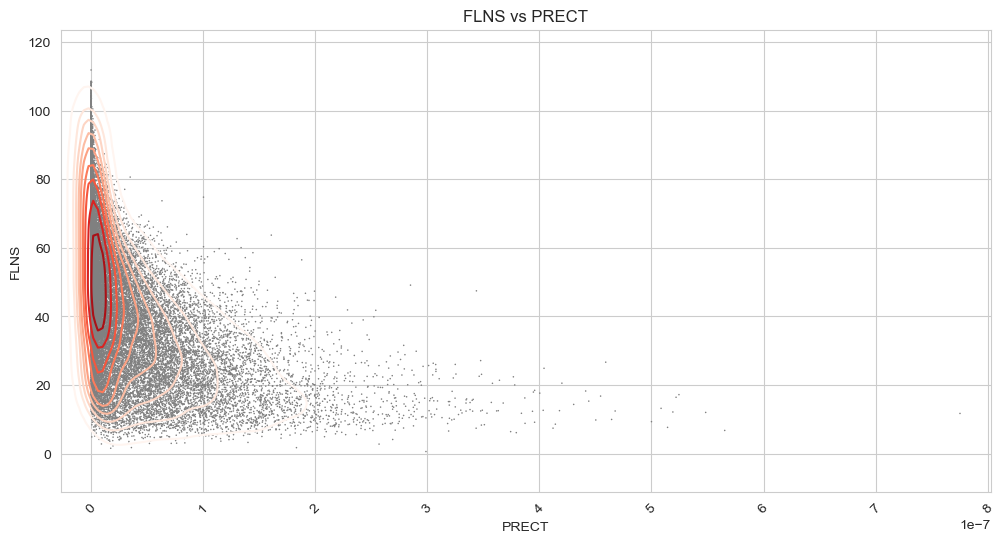

In [79]:
X = df['PRECT'].values
Y = df['FLNS'].values

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")

sns.kdeplot(x=X, y=Y, cmap="Reds", fill=False) 

plt.title('FLNS vs PRECT')
plt.xlabel('PRECT')
plt.ylabel('FLNS')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [80]:
res_FLNS_PRECT = stats.pearsonr(df['FLNS'], df['PRECT'])
res_FLNS_PRECT

PearsonRResult(statistic=-0.47385271100245935, pvalue=0.0)

In [81]:
res2_FLNS_PRECT = stats.spearmanr(df['FLNS'], df['PRECT'])
res2_FLNS_PRECT

SignificanceResult(statistic=-0.597508748081552, pvalue=0.0)